<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/TV_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBCU Data Science Case Study

Following is an in-depth analysis of the NBC Case pertaining to ratings of a television show.

In [ ]:
# Importing all libraries
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Read in the dataset for ratings per episode
df_ratings=pd.read_csv('C:/Users/mushtu/CaseStudy/mxm.csv')
#visualize the data
df_ratings.head()


,Unnamed: 0,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc
0,0,DKN,2015-09-21,10:00 PM,BLACK_S_BOT,60,3.735534,0,15.637767
1,1,DKN,2015-09-21,10:01 PM,BLACK_S_BOT,60,3.528162,0,5.965321
2,2,DKN,2015-09-21,10:02 PM,BLACK_S_BOT,60,3.540440,0,6.501681
3,3,DKN,2015-09-21,10:03 PM,BLACK_S_BOT,60,3.478097,0,5.259257
4,4,DKN,2015-09-21,10:04 PM,BLACK_S_BOT,60,3.385776,0,3.366675


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 9 columns):
Unnamed: 0              2088 non-null int64
Network                 2088 non-null object
Date                    2088 non-null object
Time                    2088 non-null object
Program                 2088 non-null object
Length                  2088 non-null int64
Rating                  2088 non-null float64
Minute_In_Commercial    2088 non-null int64
Total_Loss_perc         2088 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 146.9+ KB


In [ ]:
#Date conversion
df_ratings['Date'] = pd.to_datetime(df_ratings['Date'])

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 9 columns):
Unnamed: 0              2088 non-null int64
Network                 2088 non-null object
Date                    2088 non-null datetime64[ns]
Time                    2088 non-null object
Program                 2088 non-null object
Length                  2088 non-null int64
Rating                  2088 non-null float64
Minute_In_Commercial    2088 non-null int64
Total_Loss_perc         2088 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 146.9+ KB


# Exploratory Data Analysis

The minute by minute ratings data is useful in visualising the ratings trend through all the episodes. Here we are visualizing the data as a time series in order to observe any kind of trends that appeared throughout the season. Season 1 ends in 5/23/16. We will analyze this visualization accordingly.

Text(0.5, 1.02, 'Daily rating time series for both seasons together')

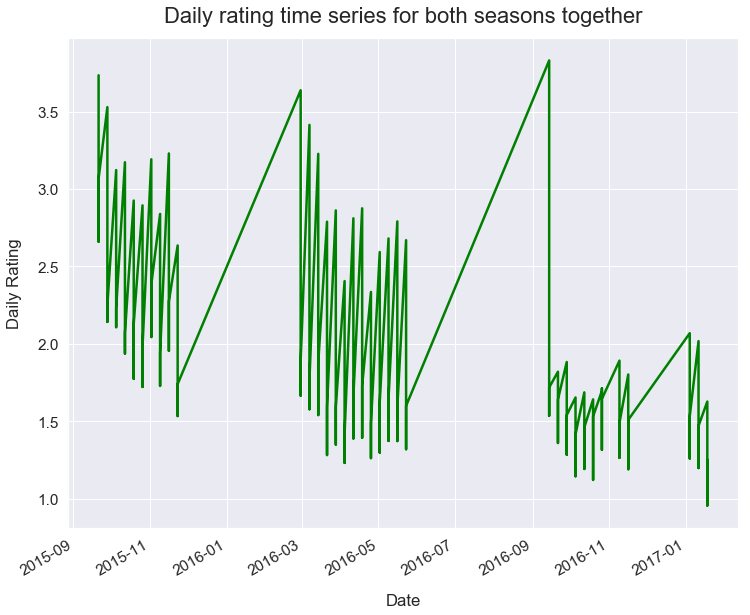

In [ ]:
sns.set(font_scale=1.4)
df_ratings.set_index('Date')['Rating'].plot(figsize=(12, 10), linewidth=2.5, color='green')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Rating", labelpad=15)
plt.title("Daily rating time series for both seasons together", y=1.02, fontsize=22)

Observations:
1. Season 2 started with quite high rating.
2. Ratings declined substantially from second episode

Note: The sudden transitions in the line plot depict the gap in dates (i.e. when no ratings were available and the episodes were not telecast).

We have data for the number of viewers lost over the seasons. Before investigating further we want to see if these numbers show any kind of trend.

Text(0.5, 1.02, 'Daily Percentage of Viewers lost for both seasons together')

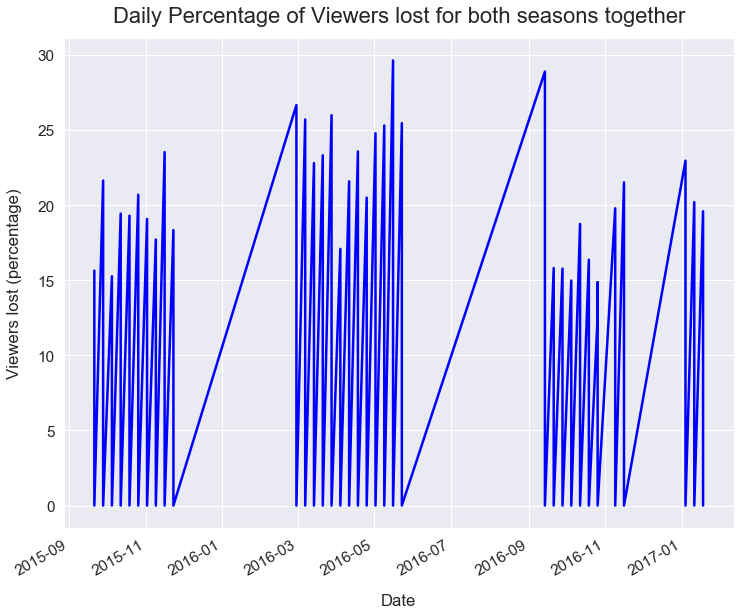

In [ ]:
sns.set(font_scale=1.4)
df_ratings.set_index('Date')['Total_Loss_perc'].plot(figsize=(12, 10), linewidth=2.5, color='blue')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Viewers lost (percentage)", labelpad=15)
plt.title("Daily Percentage of Viewers lost for both seasons together", y=1.02, fontsize=22)

Viewers lost per season almost look similar. There is no downward/upward trend from one season to another. In fact the numbers seem to have gone down a little but. Therefore the number of viwers dropping from season 1 to season 2 is a bit lower. We can confirm that using box plots for each episode.

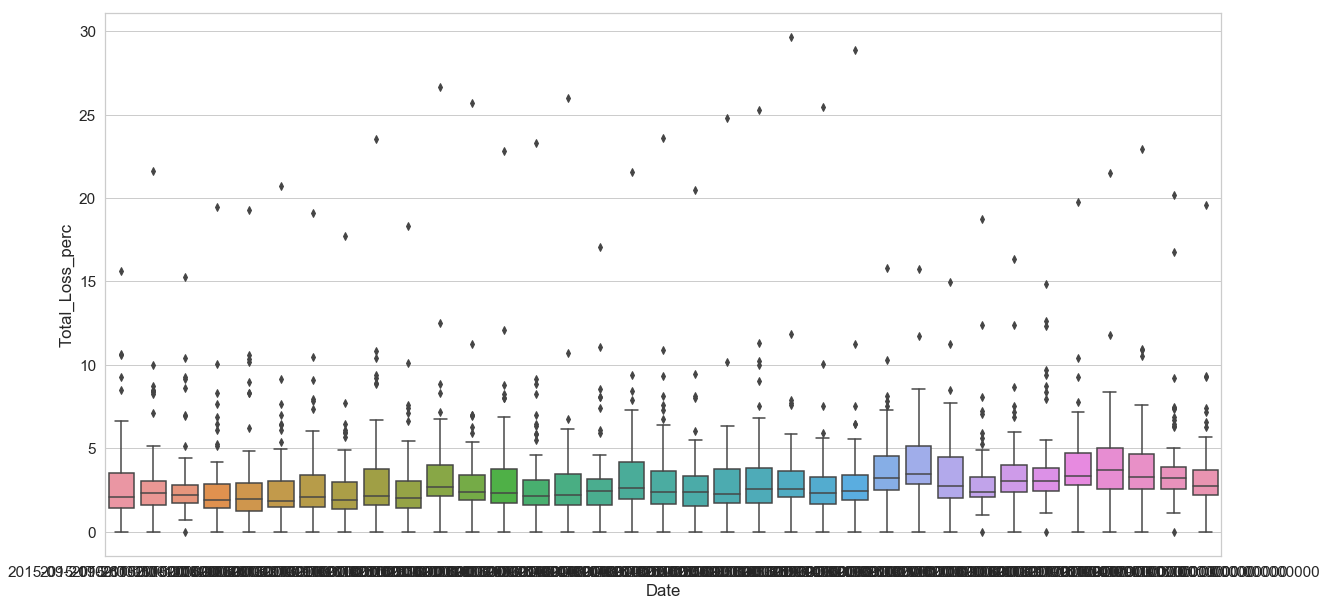

In [ ]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'Date', y = 'Total_Loss_perc', data = df_ratings)
plt.gcf().set_size_inches(20, 10)

In [ ]:
#Check correlation between Total_Loss_perc and ratings
df_ratings['Rating'].corr(df_ratings['Total_Loss_perc']) 

0.2504195253336924

A very low correlation exists between ratings and percentage viewers lost per episode. As is evident from the visualization itself that this variable does not seem to change with episodes or seasons as well.

In order to understand the ratings data better we should visualize as much as we can. Here we want to see an overall distribution of raw(unscaled) ratings for this show.

Text(0.5, 0, 'Data')

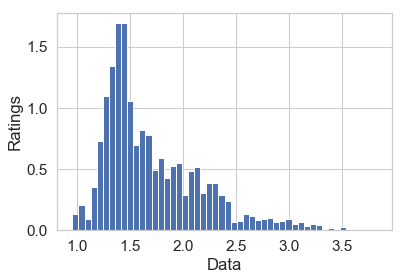

In [ ]:
# Overall distribution of ratings
plt.hist(df_ratings['Rating'], density=True, bins=50)  # density=False would make counts
plt.ylabel('Ratings')
plt.xlabel('Data')

Overall the ratings are concentrated towards 1.5. There are very few higher ratings. In fact the highest the show reaches is about 3.5.We want to visualize average ratings per episode here. This will give us a fair idea of how with every episode ratings vary.

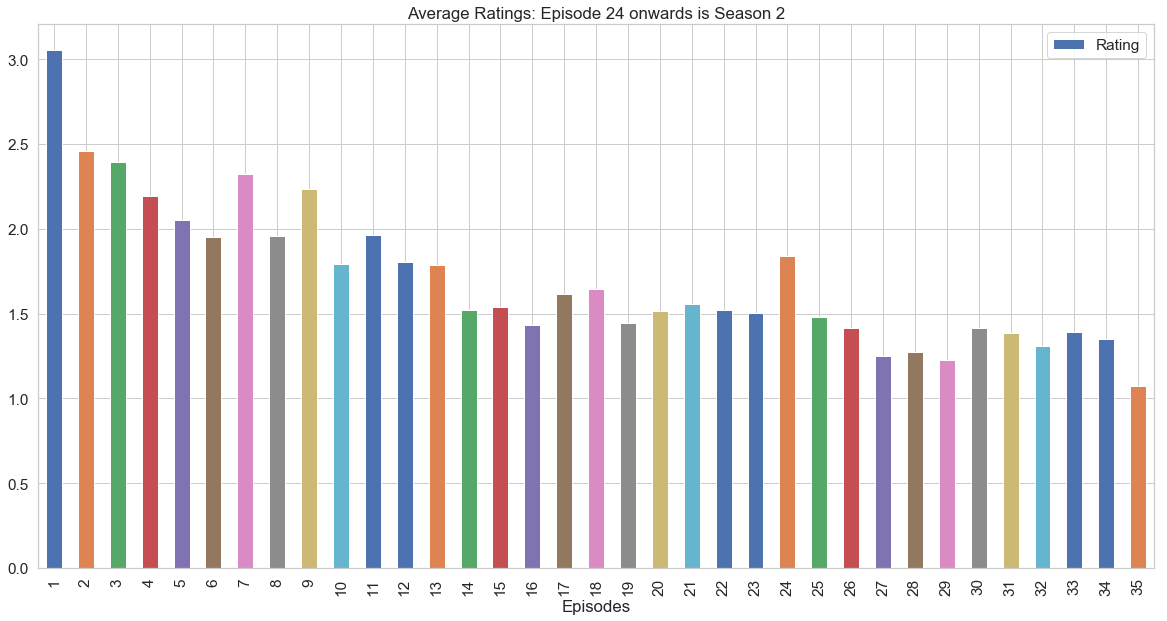

In [ ]:
temp_dfs = (df_ratings.groupby((df_ratings.Date != df_ratings.Date.shift()).cumsum())
                  .mean()
                  .reset_index(drop=True))
#Number of episodes in both seasons
temp_dfs['Episodes']=[i for i in range(1,len(temp_dfs)+1)]
temp_dfs.plot.bar(x="Episodes", y="Rating", figsize=(20,10),title="Average Ratings: Episode 24 onwards is Season 2");

plt.show(block=True)

### Observations:
Just by looking at the trend of average ratings, there is a downward trend from episode 6 onwards (2 peaks in episodes 7 and 9). When season 2 started there was a temporary spike for the first episode but after that the rating never picked up. Just by looking at the average numbers it is clear that the problem started sometime around episode 8 in season 1 and not the season finale. Also, the spike in season 2 (first episode) shows that there was a positive anticipation that eventually started to decline after episode 1 of season 2.

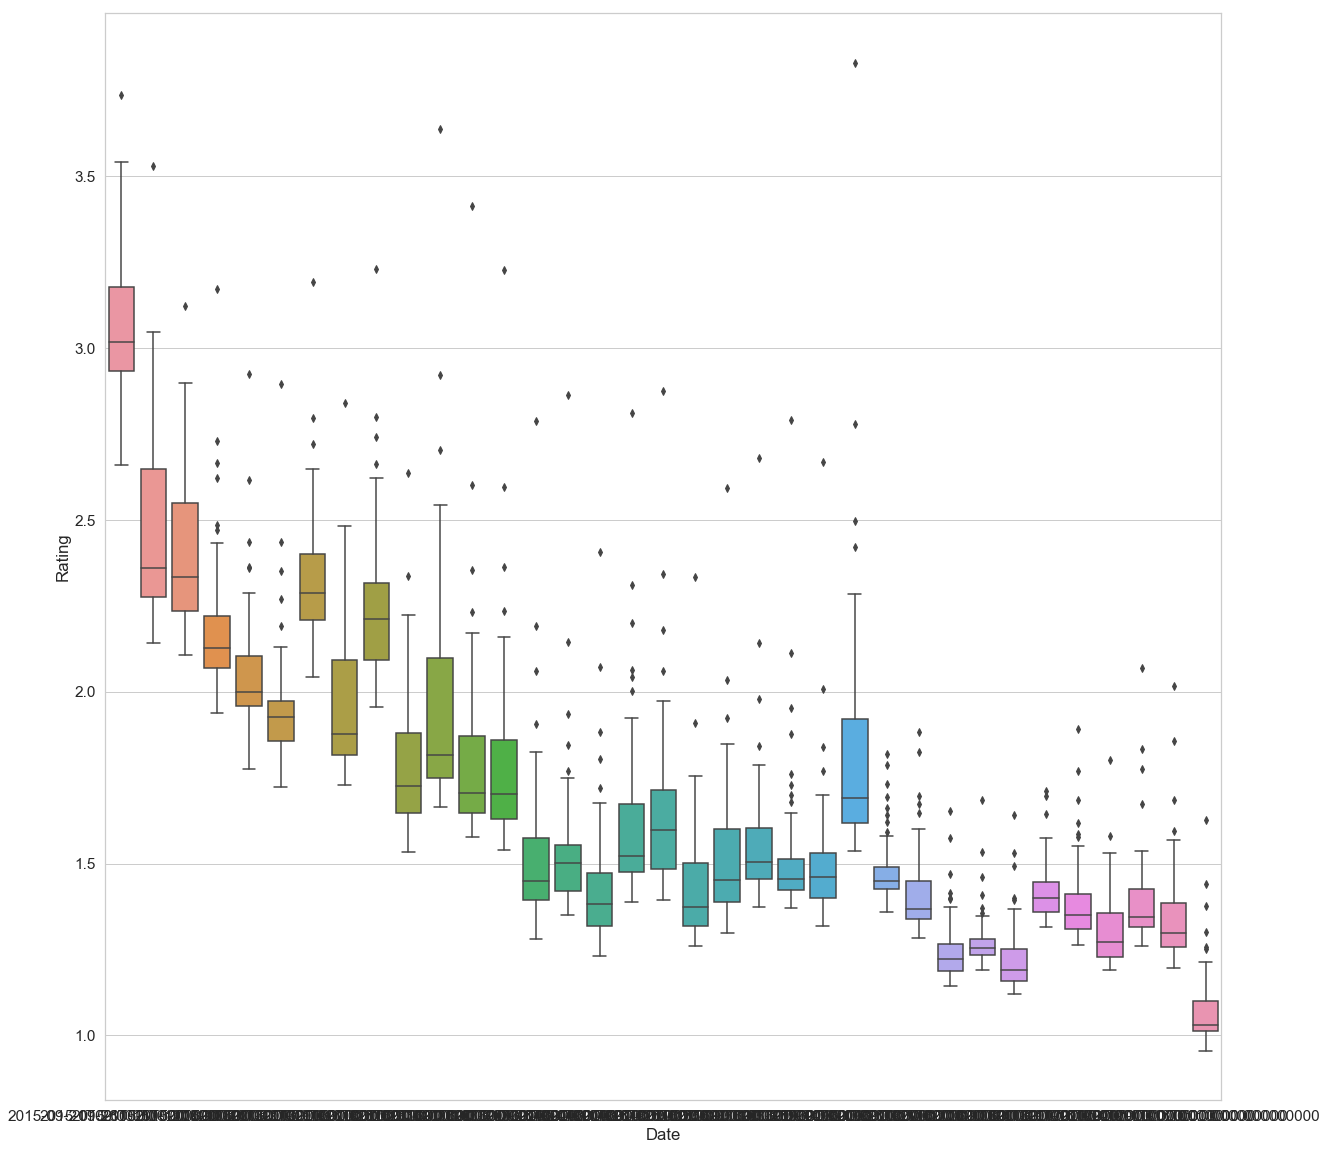

In [ ]:
#Boxplots give a better picture of distribution per episode
sns.set_style("whitegrid")
sns.boxplot(x = 'Date', y = 'Rating', data = df_ratings)
plt.gcf().set_size_inches(20, 20)

The boxplots above are showing distribution of ratings for every subsequent episode (Season 1 and Season 2). There is a downward trend in the medians and overall range.

## The network dataset

In [ ]:
# Read in the dataset for telecast ratings
df_telecast=pd.read_csv('C:/Users/mushtu/CaseStudy/seasonal_telecast_ratings.csv')
df_telecast.head()

,Unnamed: 0,show_name,network,genre,time_slot,program_start_time,program_duration,show_premier,show_repeat,rating
0,0,OF WOLVES AND MAN,JGN,Drama,2015-09-20 20:00:00,2015-09-20 20:00:00,3600,0,1,0.006776
1,1,OF WOLVES AND MAN,JGN,Drama,2015-09-20 21:00:00,2015-09-20 21:00:00,7200,0,1,0.005118
2,2,OF WOLVES AND MAN,JGN,Drama,2015-09-27 20:00:00,2015-09-27 20:00:00,3600,1,0,0.021757
3,3,OF WOLVES AND MAN,JGN,Drama,2015-10-04 20:00:00,2015-10-04 20:00:00,3600,0,0,0.018664
4,4,OF WOLVES AND MAN,JGN,Drama,2015-10-11 20:00:00,2015-10-11 20:00:00,3600,0,0,0.016884


In [ ]:
df_telecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 10 columns):
Unnamed: 0            4598 non-null int64
show_name             4593 non-null object
network               4598 non-null object
genre                 4598 non-null object
time_slot             4598 non-null object
program_start_time    4598 non-null object
program_duration      4598 non-null int64
show_premier          4598 non-null int64
show_repeat           4598 non-null int64
rating                4598 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 359.3+ KB


In [ ]:
df_telecast['program_start_time'] =  pd.to_datetime(df_telecast['program_start_time'], format='%Y/%m/%d %H:%M:%S.%f')

In [ ]:
df_telecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 10 columns):
Unnamed: 0            4598 non-null int64
show_name             4593 non-null object
network               4598 non-null object
genre                 4598 non-null object
time_slot             4598 non-null object
program_start_time    4598 non-null datetime64[ns]
program_duration      4598 non-null int64
show_premier          4598 non-null int64
show_repeat           4598 non-null int64
rating                4598 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 359.3+ KB


Visualizing the data is the key to understanding it. We want to understand how other major networks are doing in comparison to the DKN Network.The information from other networks can help determine if other shows that are telecast at the same time impact the ratings of this show.

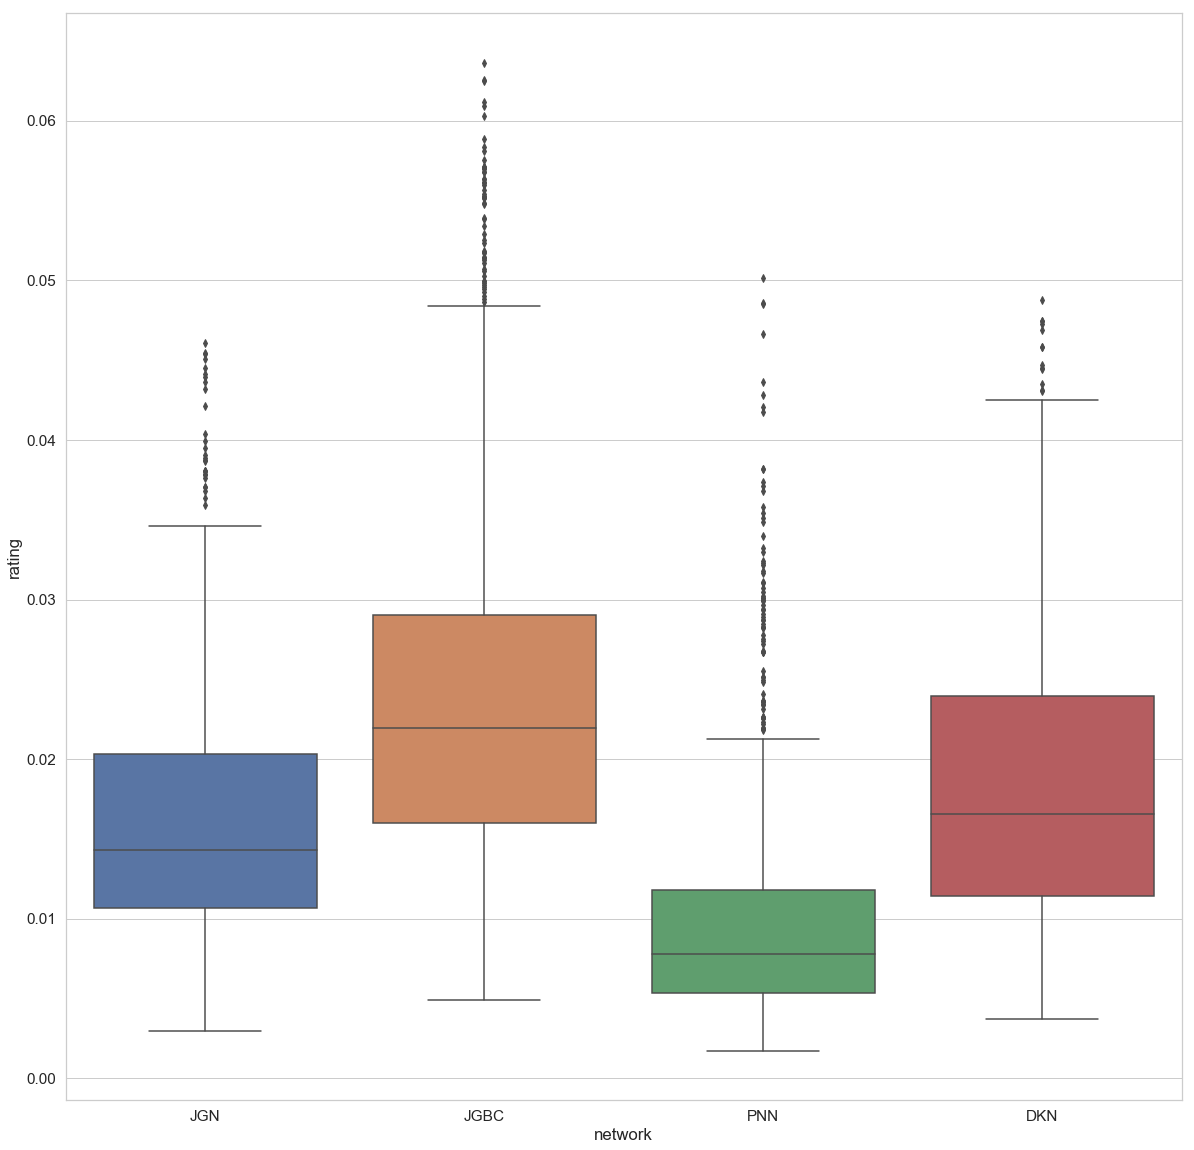

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x = 'network', y = 'rating', data = df_telecast)
plt.gcf().set_size_inches(20, 20)

It is evident that JGBC has higher median and range. JGN compares with DKN. It makes sense to visualize whether JGBC always had this dominance or it started to get higher ratings recently (due to some new show being telecast).

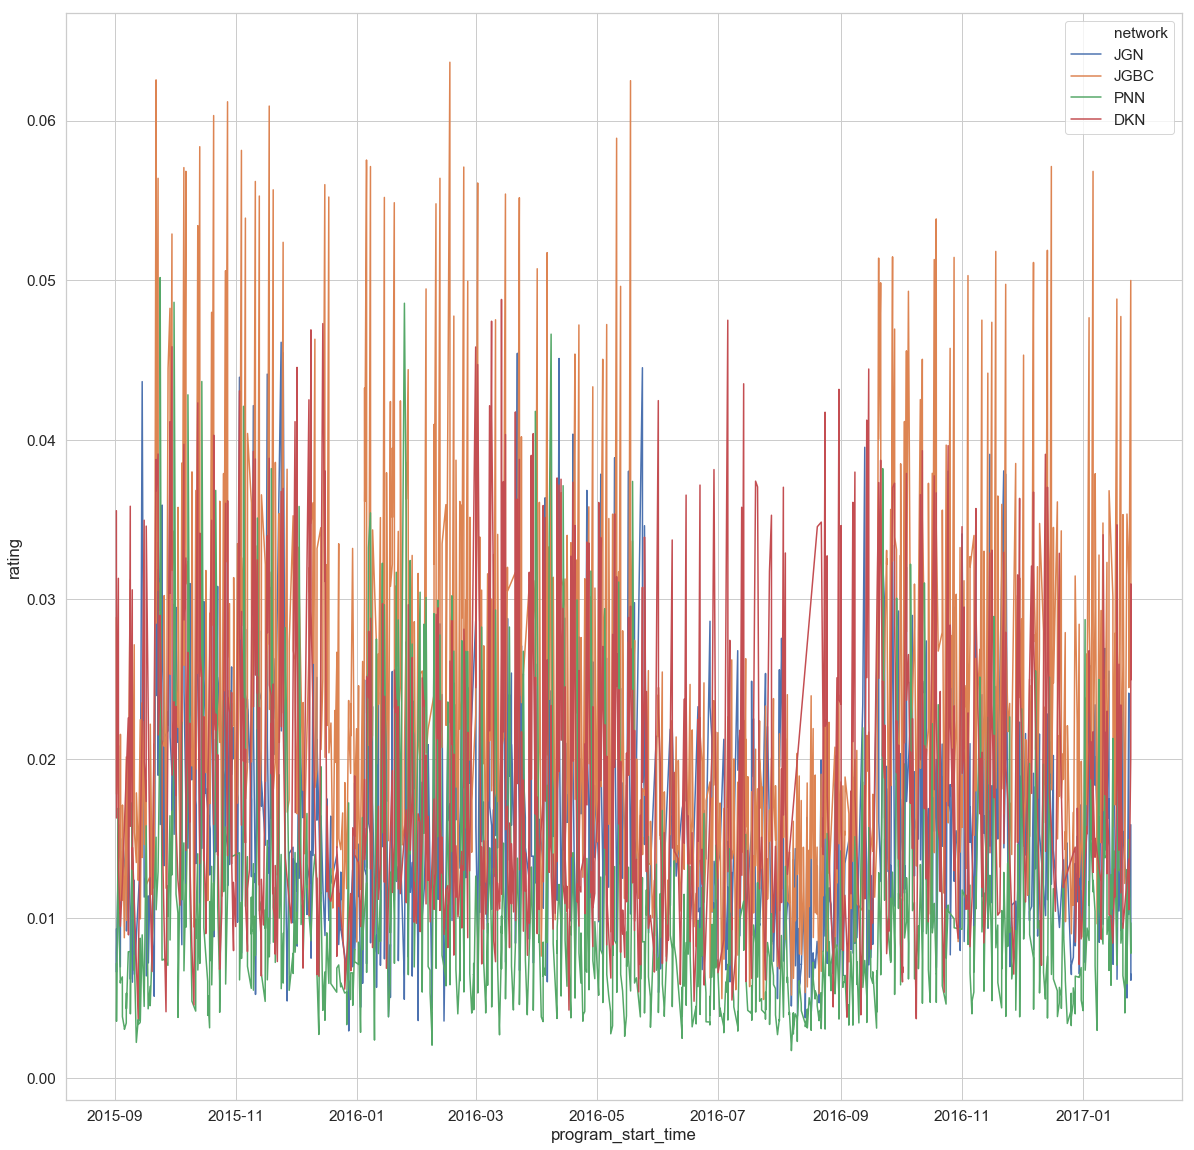

In [ ]:
# visualization of network trends
p=sns.lineplot(x="program_start_time", y="rating", hue="network", data=df_telecast)
plt.gcf().set_size_inches(20, 20)

The line plot shows that JGBC has always been a popular network. Even during season one of Black Bot, it would be having similar popularity.
Next, we will try to see the shows whose start times overlap with the Black Bot show. This will be hepful because we can visualize the overall trends in only those shows that were aired at the same time.If any shceduling conflict lead to the lower ratings then that could be avoided.

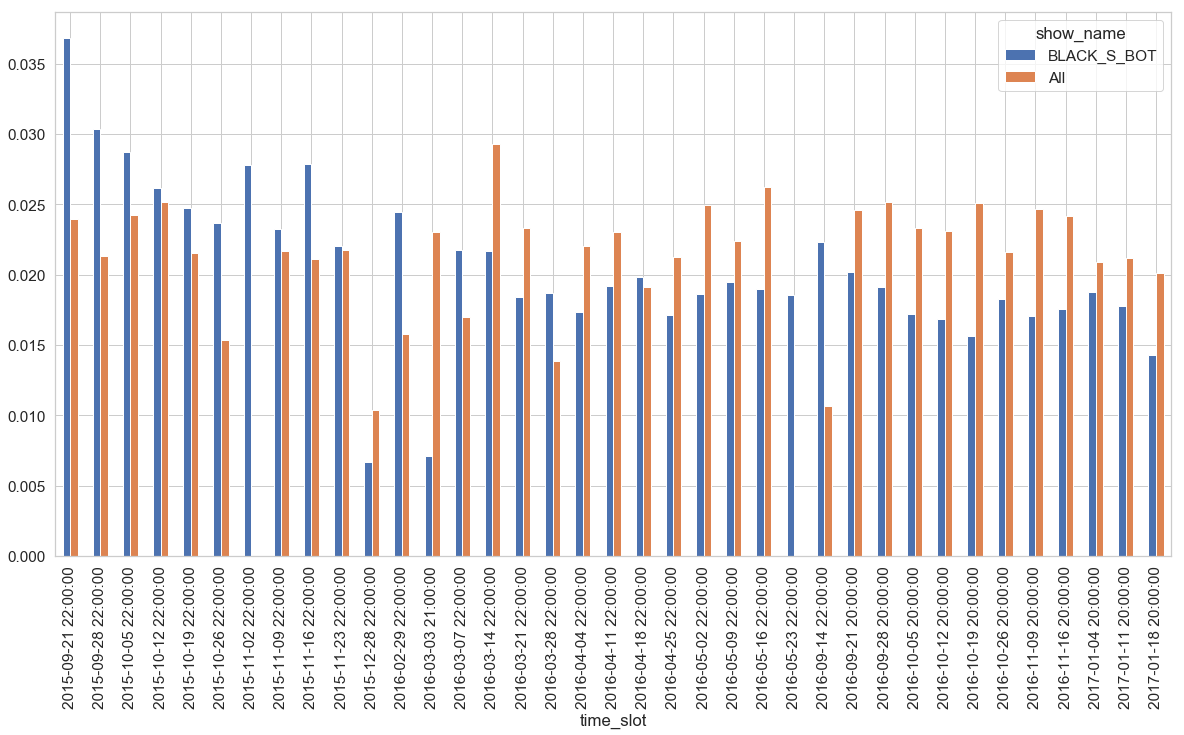

In [ ]:
#Code below finds average of all other shows that were being aired at the same time and compares against the ratings of 
#Black Bot

test=pd.pivot_table(df_telecast, index = 'time_slot', columns = 'show_name', values = 'rating', aggfunc = 'mean')
pivot_telecast=test[test['BLACK_S_BOT']>0]
pivot_telecast['All']=pivot_telecast.loc[:, ~pivot_telecast.columns.isin(['BLACK_S_BOT', 'program_start_time'])].mean(axis=1)
pivot_telecast.loc[:,['BLACK_S_BOT','All']].plot.bar(figsize=(20,10))

### Observations:

 1. Here we are looking at ratings during the program time slot only.
 2. Initially the average ratings of other overlapping shows is lower than Black S Bot but after the 10th episode of season 1 it consistently remains higher. The lower ratings in season 2 might be due to more popular shows being aired at the same time as this show.

# Models based Analysis

After the exploratory data analysis, we are interested in investigating the claim by the producer that as a result of the last episode of season 1, the ratings declined in season 2. This implies that the overall ratings of all episodes (except the last one) must be significantly better than those of season 2. In order to establish this hypothesis we can perform some statistical tests to accept or refute this hypotheses. We will compare the ratings of season 1 versus season 2 in order to check if there is a statistically significant difference.

# Test 1

Two Sample Z Test

We perform a Two Sample Z test when we want to compare the mean of two samples and the sample size is greater than 30.
Also, we have around 1000 plus data points for each group, therefore the assumption of normality holds.

The null hypothesis states that the difference in 2 samples is caused by randomization alone.

In [ ]:
df_s1 = df_ratings.iloc[:1367,:] # All season 1 episodes
df_s2 = df_ratings.iloc[1368:,:] # All season 2 episodes

In [ ]:
#Import relevant libraries
from statsmodels.stats.weightstats import ztest as ztest

In [ ]:
# Run the test
ztest(df_s1['Rating'], df_s2['Rating'], value=0) 

(28.012096885011918, 1.1573719475600457e-172)

Here the p-value is less than 0.05 (significance level) therefore we reject the null hypothesis. This means that the difference in the mean is caused by something other than randomization. There is a statistically significant decline in ratings from season 1 to season 2.

From this result we can say that the producers claim of a decline in ratings is correct. Now we have to investigate if there is a general trend of a dip in viewers ratingacross all shows or is it confined to this show. 

We have start time ratings for shows that overlap with this show during season 2 telecast. We can perform a t-test because sample size is small (13 episodes only) to see if there is a difference in the mean ratings of other shows compared to this show.

# Test 2

Two sample t-test


In [ ]:
# import libraries and run the test
import scipy.stats as stats
df_test2=pivot_telecast['All'].dropna()
stats.ttest_ind(a=df_test2, b=pivot_telecast['BLACK_S_BOT'], equal_var=True)

Ttest_indResult(statistic=0.9295511278327254, pvalue=0.35579808029699833)

The p-value is much higher than the significance level of 0.05. We fail to reject the null hypothesis and we can say that the difference in the means of the two populations is caused by randomization alone.

In other words, in season 2 there was no difference between the average ratings of this show versus the average rating of other shows taken together.

From the point of view of the producer this is important information pointing to the fact that schedule is not affecting up the ratings (because the overall average of other shows is not any better) but rather it is something to do with the transition from season 1 to season 2 that has resulted in a dip.

# Test 3

In addition to the hypothesis test above we want to see if the overall time series of ratings is stationary or not.The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a=1)

Alternate Hypothesis: The series has no unit root.

The reason we want to establish whether the series is stationary or not so that we can figure out if there exists some kind of seasonality during the entire course of the telecast.

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df_ratings['Rating'])

Results of Dickey-Fuller Test:
Test Statistic                   -4.362008
p-value                           0.000346
#Lags Used                       10.000000
Number of Observations Used    2077.000000
Critical Value (1%)              -3.433502
Critical Value (5%)              -2.862933
Critical Value (10%)             -2.567511
dtype: float64


When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic < critical value, at all significant levels which implies that the series is stationary. This implies we do not have a significant trend or seasonality in the ratings that might be impacting the decline in numbers overall.

# Predictive Analysis

Before making a final recommendation it makes sense to specifically pin down to the producer's exact observation about the last episode of season 1. We will do some kind of a predictive analysis on ratings of season 1 for all episodes except the last one. If the predicted ratings for the last episode are higher than the actual ratings (average) then we can conclude that the problem lies with the last episode. However, if the predicted ratings coincide with the actual ratings, then that points to the fact that the problem started way before the last episode which carried over to the subsequent episodes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_s1['Rating_scaled'] = scaler.fit_transform(df_s1['Rating'].values.reshape(-1,1))
df_s1.head()

,Unnamed: 0,Network,Date,Time,Program,Length,Rating,Minute_In_Commercial,Total_Loss_perc,Rating_scaled
0,0,DKN,2015-09-21,10:00 PM,BLACK_S_BOT,60,3.735534,0,15.637767,1.000000
1,1,DKN,2015-09-21,10:01 PM,BLACK_S_BOT,60,3.528162,0,5.965321,0.917207
2,2,DKN,2015-09-21,10:02 PM,BLACK_S_BOT,60,3.540440,0,6.501681,0.922109
3,3,DKN,2015-09-21,10:03 PM,BLACK_S_BOT,60,3.478097,0,5.259257,0.897219
4,4,DKN,2015-09-21,10:04 PM,BLACK_S_BOT,60,3.385776,0,3.366675,0.860359


In [ ]:
# prepare dataset for training only
df_train=df_s1.iloc[:1367,:]
df_train=df_train['Rating_scaled']

In [ ]:
X_train = []
y_train = []
for i in range(60, len(df_train)-60):
    X_train.append(df_train[i-60:i])
    y_train.append(df_train[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#import relevant libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()

# Add LSTM layer
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
# Add Regularization 
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Add output layer 
model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [ ]:
# Compile the model 

model.compile(optimizer= 'adam',
             loss='mean_squared_error')

In [ ]:
# Train the model 
model.fit(X_train, y_train, epochs = 70, batch_size= 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/70
1247/1247 [==============================] - 8s 7ms/step - loss: 0.0209
Epoch 2/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0117
Epoch 3/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0111
Epoch 4/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0101
Epoch 5/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0097
Epoch 6/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0094
Epoch 7/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0088
Epoch 8/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0089
Epoch 9/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0082
Epoch 10/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0083
Epoch 11/70
1247/1247 [==============================] - 6s 5ms/step - loss: 0.0076
Epoch 12/70
1247/1247 [==============

In [ ]:
#Prepare the test data
inputs = df_s1['Rating_scaled'].values
inputs = inputs.reshape(-1, 1)
x_test = []

for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
len(x_test)

1307

In [ ]:
predicted_rating = model.predict(x_test)
predicted_rating

array([[0.72159755],
       [0.81684303],
       [0.7267544 ],
       ...,
       [0.12237349],
       [0.13762897],
       [0.1531505 ]], dtype=float32)

In [ ]:
#Get the actual ratings from the scaled values
predicted_rating = scaler.inverse_transform(predicted_rating)
predicted_rating

array([[3.0382183],
       [3.27678  ],
       [3.0511348],
       ...,
       [1.5373397],
       [1.5755501],
       [1.6144269]], dtype=float32)

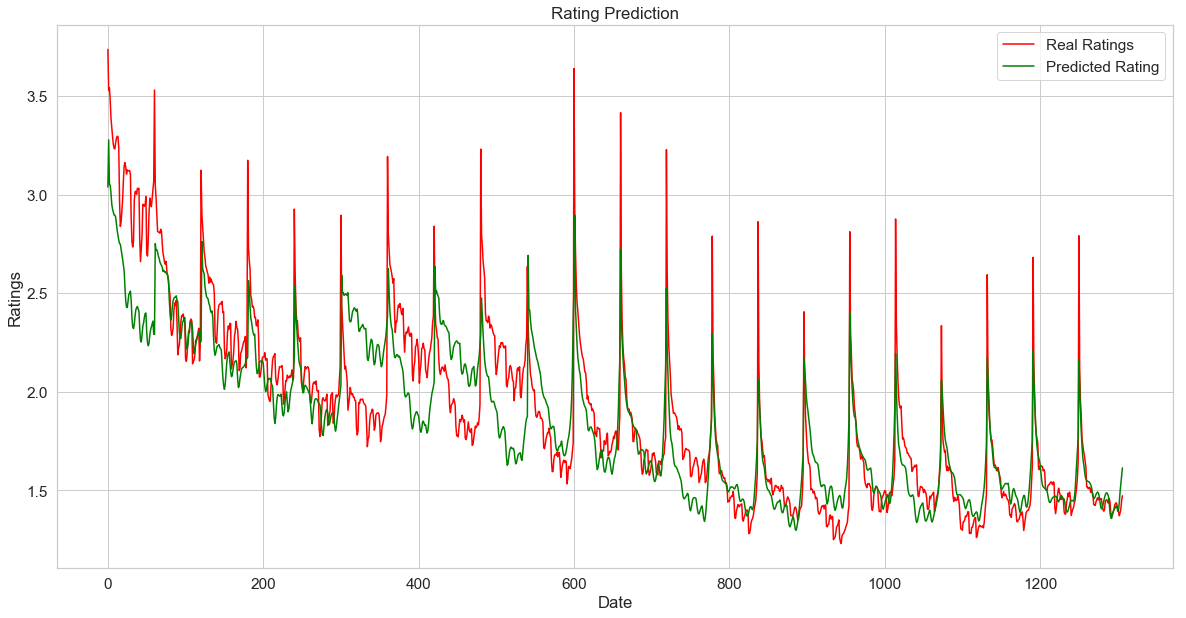

In [ ]:
from pylab import rcParams
plt.plot(df_s1.iloc[:1307,6], color = 'red', label = 'Real Ratings')
plt.plot(predicted_rating, color = 'green', label = 'Predicted Rating')
plt.title("Rating Prediction")
plt.xlabel('Date')
plt.ylabel('Ratings')
plt.legend()
rcParams['figure.figsize'] = 20, 20
plt.show()

## Evaluation

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(df_s1.iloc[:1307,6], predicted_rating))
rmse

0.23664202771906298

In [ ]:
predicted_average=sum(predicted_rating[len(predicted_rating)-60:,0])/60
actual_average=sum(df_s1.iloc[1307:,6])/60
print('Actual average rating for last episode of season 1 =',actual_average)
print('Predicted average rating for last episode of season 1 =',predicted_average)

Actual average rating for last episode of season 1 = 1.5020765608276718
Predicted average rating for last episode of season 1 = 1.525553419192632


### Observations

As is evident, the average predicted value is very close to the actual rating value. The model's root mean squared error is not very small indicating that we can improve the model if we have more time to add more layers.

Using LSTMs (a variant of Recurrent Neural Networkss) we wanted to predict the ratings for the last episode of season 1 using the data of all episodes but the last one. 

We trained the time series data using a 4 layer neural network. 

This was done in order to see if the predicted ratings for the last episode would be any different from the actual ones. The predicted ratings match closely with the actual ones for the last episode. This points to the fact that most likely the problem with the episodes (leading to lower ratings) happened much before the last episode. The recurrent neural network used here (LSTM) predicts a time series on the basis of previous information. The only previous information we used was that of previous ratings. Therefore, this points to the fact that the problem leading to lower ratings in the last episode started much earlier than the last episode itself.



# Conclusion and final recommendations

In summary, an extensive analysis was done to analyze the ratings data for the given show in order to determine the root cause of decrease in show ratings from season 1 to season 2. Following are the key findings from this analysis:

1. Exploratory data analysis and data visualization depicts that there is a continuous decrease in overall ratings from season 1 to season 2. This decline is observable right from episode 9-11 and so on. 

2. Well established statistical tests support the finding that there is indeed a significant decrease in ratings from season 1 to season 2. 

3. Statistical tests done to determine the impact of scheduling conflicts do not point to other shows doing any better. The shows that overlap in telecast timings do not have a higher rating (statistically speaking). This points to the fact that there is something with the show content/production that is leading to the decline. Scheduling does not seem to be a significant factor.

3. The ratings data is stationary. There is no significant seasonal effect which requires any further investigation.

4. A sophisticated time series predictive analysis was done using deep neural networks (specifically Recurrent Neural Networks called LSTMs). LSTMs are known for their good performance on time series data. The predictions are based solely on previous data (ratings in this case).The analysis indicates that the predicted ratings for the last episode match closely with the actual ratings. Because information from the previous episodes is used to make this prediction, therefore the decrease in overall ratings can be attributed to some of the earlier episodes as well and not just the last episode. If the last episode was the only reason for low ratings then the predicted ratings would be significantly higher from the actual ratings for this episode (which is not the case).


Conclusion: The production team needs to closely look at the content related details right around mid-season 1. The decrease in ratings is significant from season 1 to season 2 which is apparantly not caused by shceduling conflicts and/or solely the last episode. The problem started much earlier.

NOTE: The conclusion is derived only on the basis of provided data.